In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stopwords/stopwords.txt
/kaggle/input/mdss-basic-stream/test_basic.csv
/kaggle/input/mdss-basic-stream/train_basic.csv


## Reading the data and having a first look

In [124]:
import pandas as pd

data = pd.read_csv("/kaggle/input/mdss-basic-stream/train_basic.csv")

data.head(20)
# print(tweets.describe())
# tweets.label.unique()
# print(tweets.columns)
# tweets.loc[]


data.dropna(subset=["tweet"],inplace=True)
data.reset_index(drop=True,inplace=True)


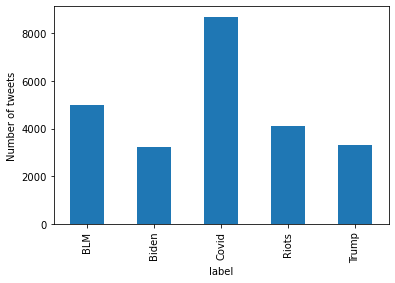

In [3]:
import matplotlib.pyplot as plt
plt.figure()
data.groupby("label").size().plot(kind = 'bar')
plt.ylabel("Number of tweets")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

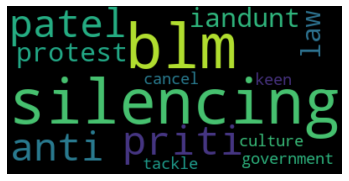

In [5]:
from wordcloud import WordCloud


plt.imshow(WordCloud().generate(data.tweet[0]),interpolation = 'bilinear')
plt.axis("off")

In [ ]:
data.iloc[54]

In [125]:
# Applying regex on the dataset to remove unwanted characters and whitespace
import re
for i in range(0,data.shape[0]):
    
    # Remove hyperlinks
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', str(data.tweet[i]))
    
    #Remove RT
    x = re.sub(r'^rt[\s]+', '', x)
    
    #Remove # from the word
    x = re.sub(r'#', '', x)

    #Remove special characters
    x = re.sub(r'\W', ' ', x)

    # Remove x followed by some characters
    x = re.sub(r'[x][a-zA-Z0-9][a-zA-Z0-9]','',x)

    # remove all single characters
    x = re.sub(r'\s+[a-zA-Z]\s+', ' ', x)
    
    # Remove single characters from the start
    x = re.sub(r'\^[a-zA-Z]\s+', ' ', x) 
    
    # Substituting multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    
    
    data.tweet[i] = x

    
    
  

In [ ]:
data.tweet

In [106]:
from nltk.tokenize import RegexpTokenizer

# tokenizer.tokenize(x.lower())
data['tokenized_tweets'] = data.tweet.apply(lambda df: RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?").tokenize(df.lower()))

In [ ]:
data.tokenized_tweets

In [107]:
# Removing stopwords

# from nltk.corpus import stopwords

# stopwords = stopwords.words('english')
# stopwords

data['sw_tokenized_tweets'] = data.tokenized_tweets
stopwords = []
with open('/kaggle/input/stopwords/stopwords.txt') as f:
    stopwords = f.read().splitlines()
stopwords = set(stopwords)    
# print(stopwords)


def rem_sw(tw):
    for word in tw:
        if word in stopwords:
            tw.remove(word)
#     print(tw)        

for i in data.sw_tokenized_tweets:
    rem_sw(i)

# for i in data.tokenized_tweets:
#     if stopwords in i:
#         print(1)

In [108]:
data.sw_tokenized_tweets

0        [silencing, blm, priti, patel, anti, protest, ...
1        [trillian, johnbok, nadiawhittomemp, silly, li...
2        [errolwebber, tell, would, be, considered, rac...
3        [apple, won, parler, an, app, still, twitter, ...
4        [malika, andrews, wojespn, we, jlm, trending, ...
                               ...                        
24324    [have, brainwashed, base, generations, still, ...
24325    [blackcat, neanderthals, there, blm, blacklive...
24326    [atrupar, dear, jaketapper, instead, airing, t...
24327    [is, bombshell, nmarjorie, greene, have, geniu...
24328    [tomthunkitsmind, talk, white, supremacy, ncap...
Name: sw_tokenized_tweets, Length: 24329, dtype: object

### Stemming

In [109]:
from nltk.stem.porter import *

data["stemmed_tweets"] = data.sw_tokenized_tweets

# stemmer = PorterStemmer()
# stemmed_tweet = []

# for word in data.stemmed_tweets[0]:
#     stemmed_tweet.append(stemmer.stem(word))
# print(stemmed_tweet) 
# print(data.stemmed_tweets[0])

def stemming(i):
    stemmer = PorterStemmer()
    stemmed_tweet = []
    for t in data.stemmed_tweets[i]:
        stemmed_tweet.append(stemmer.stem(t))
    data.stemmed_tweets[i] = stemmed_tweet
    
for i in range(0,data.shape[0]):
    stemming(i)
    
    

In [ ]:
data.stemmed_tweets

In [ ]:
from nltk.stem import WordNetLemmatizer 

data["lemmatized_tweets"] = data.sw_tokenized_tweets

def lemmatization(i):
    lemmatizer = WordNetLemmatizer() 
    lemmatized_tweet = []
    for t in data.lemmatized_tweets[i]:
        lemmatized_tweet.append(lemmatizer.lemmatize(t))
    data.lemmatized_tweets[i] = lemmatized_tweet
    
for i in range(0,data.shape[0]):
    lemmatization(i)
    

In [ ]:
data.lemmatized_tweets

## Pos tagging (Parts of speech tagging)

- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective ‘big’
- JJR adjective, comparative ‘bigger’
- JJS adjective, superlative ‘biggest’
- LS list marker 1)
- MD modal could, will
- NN noun, singular ‘desk’
- NNS noun plural ‘desks’
- NNP proper noun, singular ‘Harrison’
- NNPS proper noun, plural ‘Americans’
- PDT predeterminer ‘all the kids’
- POS possessive ending parent’s
- PRP personal pronoun I, he, she
- PRP possessive pronoun my, his, hers
- RB adverb very, silently,
- RBR adverb, comparative better
- RBS adverb, superlative best
- RP particle give up
- TO, to go ‘to’ the store.
- UH interjection, errrrrrrrm
- VB verb, base form take
- VBD verb, past tense took
- VBG verb, gerund/present participle taking
- VBN verb, past participle taken
- VBP verb, sing. present, non-3d take
- VBZ verb, 3rd person sing. present takes
- WDT wh-determiner which
- WP wh-pronoun who, what
- WP possessive wh-pronoun whose
- WRB wh-abverb where, when

In [ ]:
# import nltk

# data["pos_tagged_tweets"] = data.stemmed_tweets

# for i in range(0,data.shape[0]):
#     data.pos_tagged_tweets[i] = nltk.pos_tag(data.pos_tagged_tweets[i])


In [ ]:
data.pos_tagged_tweets

### Bag of Words

___Helps us to extract features from tweets___

In [ ]:
# #making dictionary
# data["wordfreq_dicts"] = data.sw_tokenized_tweets

# def create_wordfreq_dict(i):
#     wordfreq = {}
#     for token in data.wordfreq_dicts[i]:
#         if token not in wordfreq.keys():
#             wordfreq[token] = 1
#         else:
#             wordfreq[token] += 1
#     data.wordfreq_dicts[i] = wordfreq
    
# for i in range(0,data.shape[0]):
#     create_wordfreq_dict(i)


In [ ]:
data.wordfreq_dicts

### Scikit-learn has a high level component which will create feature vectors for us ‘CountVectorizer’ using Bag of Words internally.

### Using stemmed_tweets as input

In [115]:
from sklearn.model_selection import train_test_split

data["stemmed"] = data.stemmed_tweets.apply(lambda df: " ".join(df))

type(data.stemmed[0])


X_train,X_valid,y_train,y_valid = train_test_split(data.stemmed,data.label)

### Using lemmatized tweets as input

In [ ]:
from sklearn.model_selection import train_test_split

data["stemmed"] = data.lemmatized_tweets.apply(lambda df: " ".join(df))

type(data.stemmed[0])


X_train,X_valid,y_train,y_valid = train_test_split(data.stemmed,data.label)

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


X_train,X_valid,y_train,y_valid = train_test_split(data.tweet,data.label)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape



(18246, 34171)

In [ ]:
print(X_train_counts)

TF: Just counting the number of words in each document has 1 issue: it will give more weightage to longer 
documents than shorter documents. To avoid this, we can use frequency (TF - Term Frequencies) 
i.e. #count(word) / #Total words, in each documents.



TF-IDF: Finally, we can even reduce the weightage of more common words like (the, is, an etc.) which occurs in all document. This is called as TF-IDF i.e Term Frequency times inverse document frequency.
We can achieve both using below line of code:

The last line will output the dimension of the Document-Term matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

In [ ]:
print(X_train_tfidf)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Make copy to avoid changing original data
label_y_train = pd.DataFrame(y_train.copy())
label_y_valid = pd.DataFrame(y_valid.copy())

label_y_train.label = label_encoder.fit_transform(label_y_train.label)
label_y_valid.label = label_encoder.fit_transform(label_y_valid.label)


## Modelling using Naive Bayes Classifier in a pipeline

In [127]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np

text_clf = Pipeline(steps=[('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()) ])
text_clf = text_clf.fit(X_train.to_numpy(),y_train)

predicted = text_clf.predict(X_valid)
predicted.shape
print("Accuracy on validation set", np.mean(predicted == y_valid))

Accuracy on validation set 0.7527535755383856


### Modelling using Naive Bayes on stemmed tweets in a pipeline

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

text_clf = Pipeline(steps=[('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()) ])
text_clf = text_clf.fit(X_train.to_numpy(),y_train)

predicted = text_clf.predict(X_valid)
predicted.shape
print("Accuracy on validation set", np.mean(predicted == y_valid))

Accuracy on validation set 0.766398158803222


### Hyperparametertuned NBClassifier on stemmed tweets

In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

text_clf = Pipeline(steps=[('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=False)),
                     ('clf', MultinomialNB(alpha= 0.01)) ])
text_clf = text_clf.fit(X_train.to_numpy(),y_train)

predicted = text_clf.predict(X_valid)
predicted.shape
print("Accuracy on validation set", np.mean(predicted == y_valid))

# {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

Accuracy on validation set 0.8398816373499918


### Modelling using Naive Bayes on lemmatized tweets in a pipeline

In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

text_clf = Pipeline(steps=[('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()) ])
text_clf = text_clf.fit(X_train.to_numpy(),y_train)

predicted = text_clf.predict(X_valid)
predicted.shape
print("Accuracy on validation set", np.mean(predicted == y_valid))

Accuracy on validation set 0.7642610554002959


## Modelling using SVM in a pipeline

In [129]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                  ('clf-svm', SGDClassifier( )), ])
text_clf_svm.fit(X_train.to_numpy(), y_train)
predicted_svm = text_clf_svm.predict(X_valid)
print("Accuracy on validation set",np.mean(predicted_svm == y_valid))

Accuracy on validation set 0.8760480026302812


## Modelling on stemmed tweets using SVM in a pipeline

In [111]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                  ('clf-svm', SGDClassifier(random_state=1 )), ])
text_clf_svm.fit(X_train.to_numpy(), y_train)
predicted_svm = text_clf_svm.predict(X_valid)
print("Accuracy on validation set",np.mean(predicted_svm == y_valid))

Accuracy on validation set 0.8775275357553839


### Hyperparametertuned SGD on stemmed tweets

In [119]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                  ('clf-svm', SGDClassifier(alpha = 0.0001,random_state=3)), ])
text_clf_svm.fit(X_train.to_numpy(), y_train)
predicted_svm = text_clf_svm.predict(X_valid)
print("Accuracy on validation set",np.mean(predicted_svm == y_valid))

Accuracy on validation set 0.8783494986026632


## Modelling on lematized tweets using SVM in a pipeline

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                  ('clf-svm', SGDClassifier( )), ])
text_clf_svm.fit(X_train.to_numpy(), y_train)
predicted_svm = text_clf_svm.predict(X_valid)
print("Accuracy on validation set",np.mean(predicted_svm == y_valid))

In [ ]:
print(X_train,y_train)

### Hyperparamter Tuning Naive Bayes Classifier on stemmed tweets using GridSearchCV

In [16]:

# param = {
#     "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
#     "alpha" : [0.0001, 0.001, 0.01, 0.1],
#     "penalty" : ["l2", "l1", "none"],
# }

from sklearn.model_selection import GridSearchCV
param = {
             'tfidf__use_idf': (True, False),            
              'clf__alpha': (1e-2, 1e-3),
}

gs_nb = GridSearchCV(text_clf, param_grid=param, n_jobs=-1)
gs_nb = gs_nb.fit(data.stemmed, data.label)
# model = SGDClassifier(max_iter=1000)
# Label = data.label
# Label.loc[Label == 'BLM'] = 1
# Label.loc[Label == 'Trump'] = 2
# Label.loc[Label == 'Biden'] = 3
# Label.loc[Label == 'Covid'] = 4
# Label.loc[Label == 'Riots'] = 5
# Label.unique()
# grid.fit(data.stemmed,Label)

In [70]:
from sklearn.model_selection import GridSearchCV

param = {
    "clf-svm__loss" :  ["hinge", "log"], 
    "clf-svm__alpha" : [0.0001, 0.001, 0.01, 0.1],
    "clf-svm__penalty" : ["l2", "l1", "none","elasticnet"],
}
gs_sgd = GridSearchCV(text_clf_svm,param_grid = param,n_jobs=-1,cv=3,verbose=5)
gs_sgd = gs_sgd.fit(data.stemmed,data.label)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [71]:
# print(gs_nb.best_params_)
print(gs_sgd.best_params_)

{'clf-svm__alpha': 0.0001, 'clf-svm__loss': 'hinge', 'clf-svm__penalty': 'l2'}


### Prediction on Test Set

In [130]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                  ('clf-svm', SGDClassifier() ), ])
text_clf_svm.fit(data.tweet, data.label)

data_test = pd.read_csv("/kaggle/input/mdss-basic-stream/test_basic.csv")
# data_test.dropna(subset=["tweet"],inplace=True)
# data_test.reset_index(drop=True,inplace=True)


In [121]:
# for i in range(0,data_test.shape[0]):
    
#     # Remove hyperlinks
#     x = re.sub(r'https?:\/\/.*[\r\n]*', '', str(data_test.tweet[i]))
    
#     #Remove RT
#     x = re.sub(r'^rt[\s]+', '', x)
    
#     #Remove # from the word
#     x = re.sub(r'#', '', x)

#     #Remove special characters
#     x = re.sub(r'\W', ' ', x)

#     # Remove x followed by some characters
#     x = re.sub(r'[x][a-zA-Z0-9][a-zA-Z0-9]','',x)

#     # remove all single characters
#     x = re.sub(r'\s+[a-zA-Z]\s+', ' ', x)
    
#     # Remove single characters from the start
#     x = re.sub(r'\^[a-zA-Z]\s+', ' ', x) 
    
#     # Substituting multiple spaces with single space
#     x = re.sub(r'\s+', ' ', x, flags=re.I)
    
    
#     data_test.tweet[i] = x

# data_test['tokenized_tweets'] = data_test.tweet.apply(lambda df: RegexpTokenizer(r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?").tokenize(df.lower()))
# data_test['sw_tokenized_tweets'] = data_test.tokenized_tweets
# stopwords = []
# with open('/kaggle/input/stopwords/stopwords.txt') as f:
#     stopwords = f.read().splitlines()
# stopwords = set(stopwords)    
# # # print(stopwords)
       

# for i in data_test.sw_tokenized_tweets:
#     rem_sw(i)
# data_test["tweet"] = data_test.sw_tokenized_tweets.apply(lambda df: " ".join(df))    
# # data_test.head(5)
predicted_svm = text_clf_svm.predict(data_test.tweet)
fin_preds = pd.concat([data_test.Train_id,pd.Series(predicted_svm,name='Label')],axis=1)
data_test.tweet.head()
# .to_csv("./preds.csv")
# We need to perform cleaning and regex on test data before predicting and generating csv

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    congratulations rrhdr and publichealthumn nso ...
1    the same people who perpetrated the whitesupre...
2    fannie lou hamer nblackhistory nblackhistorymo...
3    kylandyoung williamcson 90 million properly di...
4    its the colors for the month for me nblacklive...
Name: tweet, dtype: object

In [122]:
fin_preds = fin_preds.set_index("Train_id")
print(fin_preds)
fin_preds.to_csv("./Team Machine.csv")

          Label
Train_id       
1           BLM
2         Riots
3           BLM
4           BLM
5           BLM
...         ...
5960      Riots
5961      Riots
5962      Riots
5963      Covid
5964      Trump

[5964 rows x 1 columns]


In [ ]:
predicted_svm[10],data_test.tweet.iloc[10]